In [1]:
#importing libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

LOADING DATASET


In [2]:
df = pd.read_csv('/content/drive/MyDrive/projects data sets ml/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


SIZE OF DATASET

In [5]:
df.shape

(418, 12)

INFORMATION OF DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


CHECKING NULL VALUES

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df=df.drop(columns='Cabin',axis =1)

In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [12]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**DATA** **VISUALIZATION**


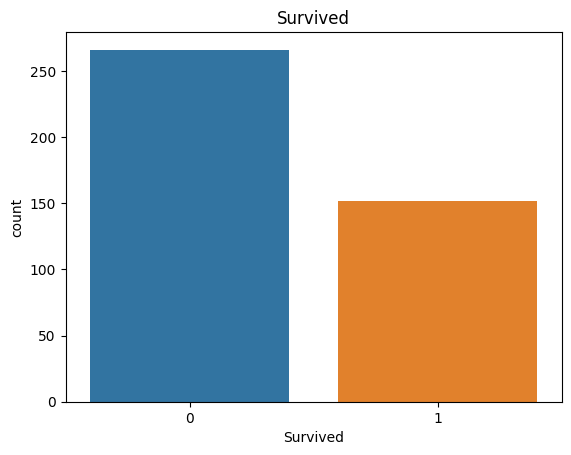

In [16]:
sns.countplot(x='Survived',data=df)
plt.title('Survived')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

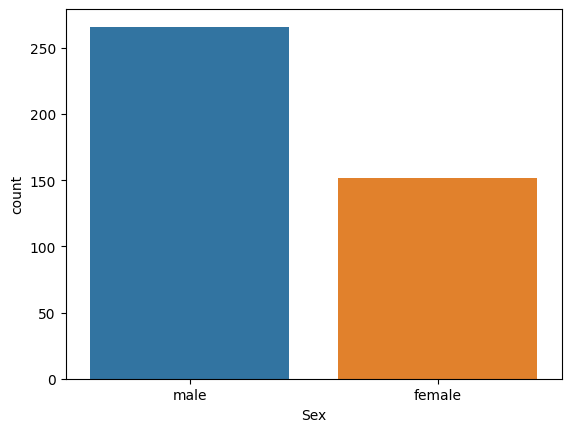

In [17]:
sns.countplot(x='Sex',data=df)

In [18]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

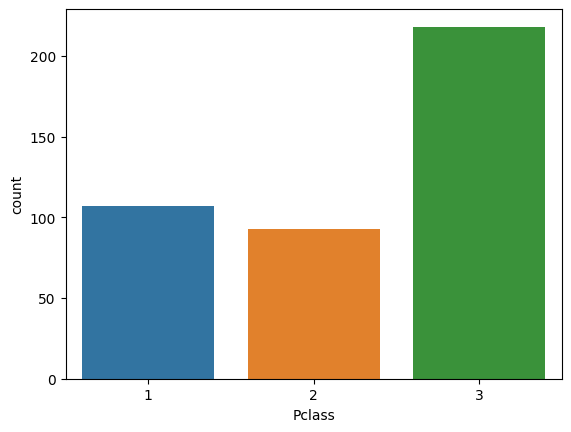

In [19]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

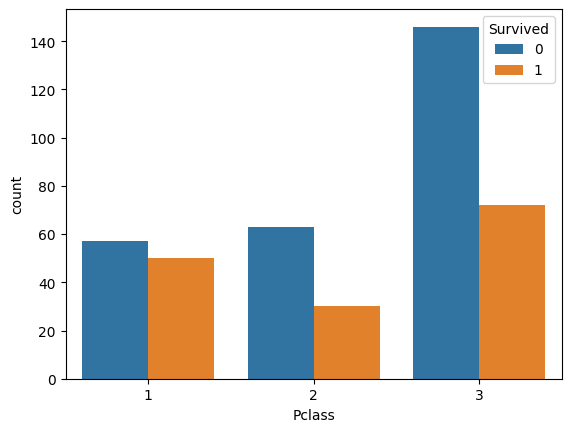

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [21]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

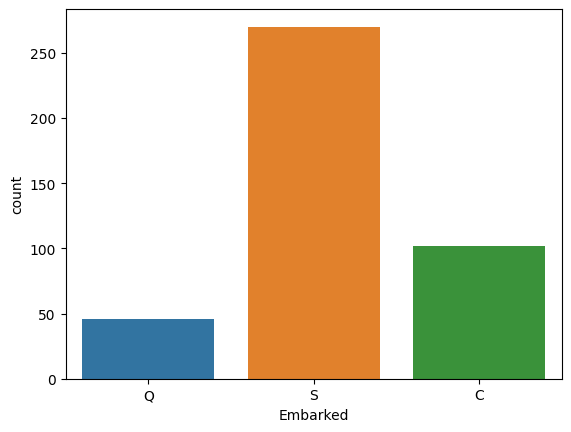

In [22]:
sns.countplot(x='Embarked',data=df)

In [23]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

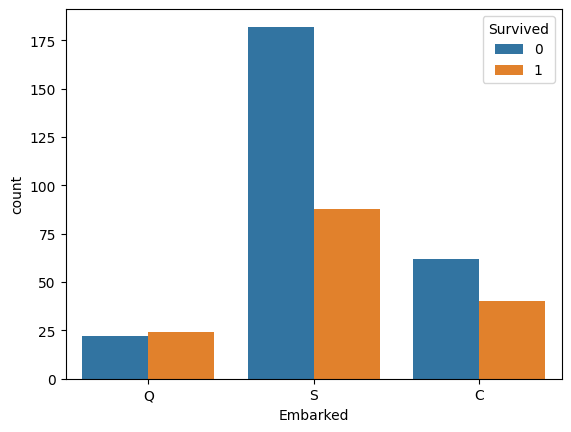

In [24]:
sns.countplot(x='Embarked',hue='Survived',data=df)

HEATMAP

<Axes: >

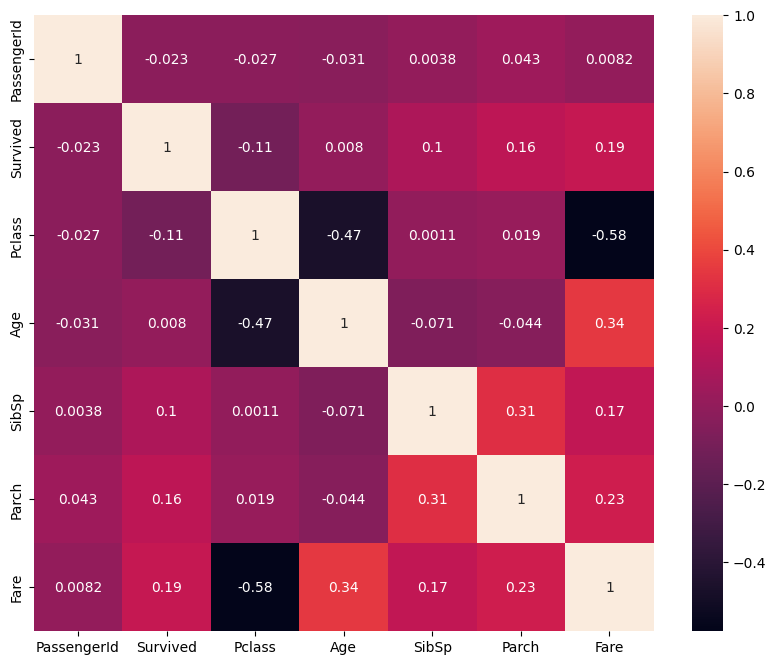

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

**DATA** **PRE**-**PROCESSING**

ENCODING the categorical feactures

In [26]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


SPLITTING FEATURES AND TARGET

In [30]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [31]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         2
1         3    1  47.0      1      0    7.0000         0
2         2    0  62.0      0      0    9.6875         2
3         3    0  27.0      0      0    8.6625         0
4         3    1  22.0      1      1   12.2875         0
..      ...  ...   ...    ...    ...       ...       ...
413       3    0  27.0      0      0    8.0500         0
414       1    1  39.0      0      0  108.9000         1
415       3    0  38.5      0      0    7.2500         0
416       3    0  27.0      0      0    8.0500         0
417       3    0  27.0      1      1   22.3583         1

[418 rows x 7 columns]


In [32]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


SPLITTING DATA INTO TRANING AND TESTING DATA

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


**MODEL** **TRANING**

Loading Logistic Regression Model

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = log_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 1, 1])

In [38]:
confusion_matrix(y_test,y_pred)

array([[51,  0],
       [ 0, 33]])

In [39]:
accuracy_score(y_test,y_pred)

1.0

**Building Predictive Model**

In [42]:
input_data = (      3 ,   1,  22.0 ,     1  ,    1 ,  12.2875 ,        0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_model.predict(input_data_reshaped)
print(prediction)

[1]
